___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### *ii. Load Dataset*

In [3]:
df0 = pd.read_csv('treetypes.csv')
df = df0.copy()


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [8]:
df.apply(lambda x: x.nunique())

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

**Summary results :**
- "Elevation", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points" are continuous variables and their values vary.
- "Aspect" is also continuous and its values vary from 0 to 360. It has angular values.
- "Hillshade_3pm", "Hillshade_Noon", "Hillshade_3pm" are also continuos and their values vary from 0 to 255. This means that the values represent bitwise value. I concluded that the values are RGB color representation of the shadow at a particular time.
- Wilderness_Areas and Soil_Types are categorical (binary 1 or 0) data.

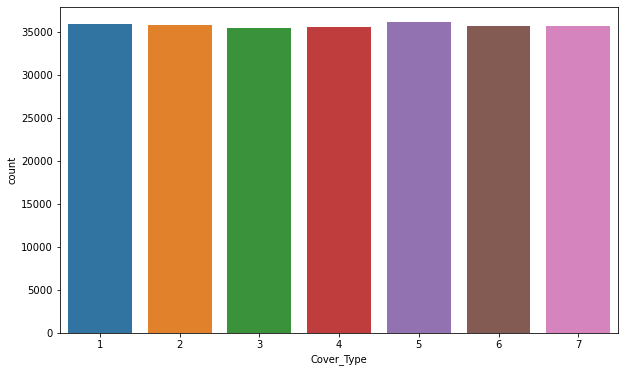

In [11]:
sns.countplot(df.Cover_Type);
# balanced  data

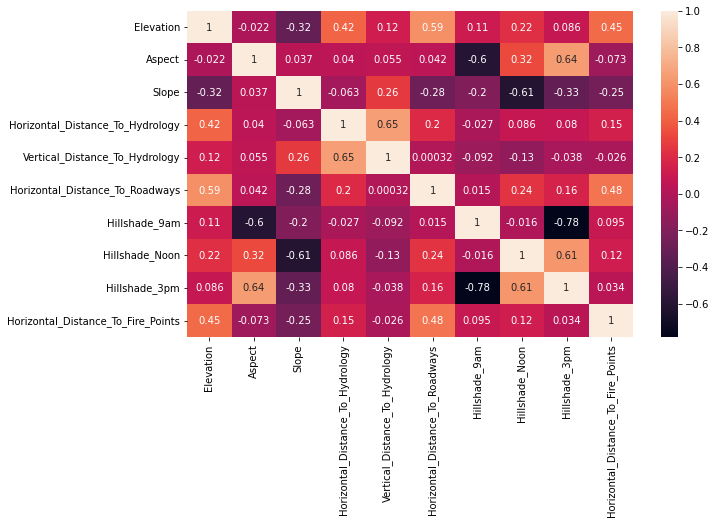

In [12]:

sns.heatmap(df[df.columns[:10]].corr(),annot=True)
plt.show()


***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [13]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

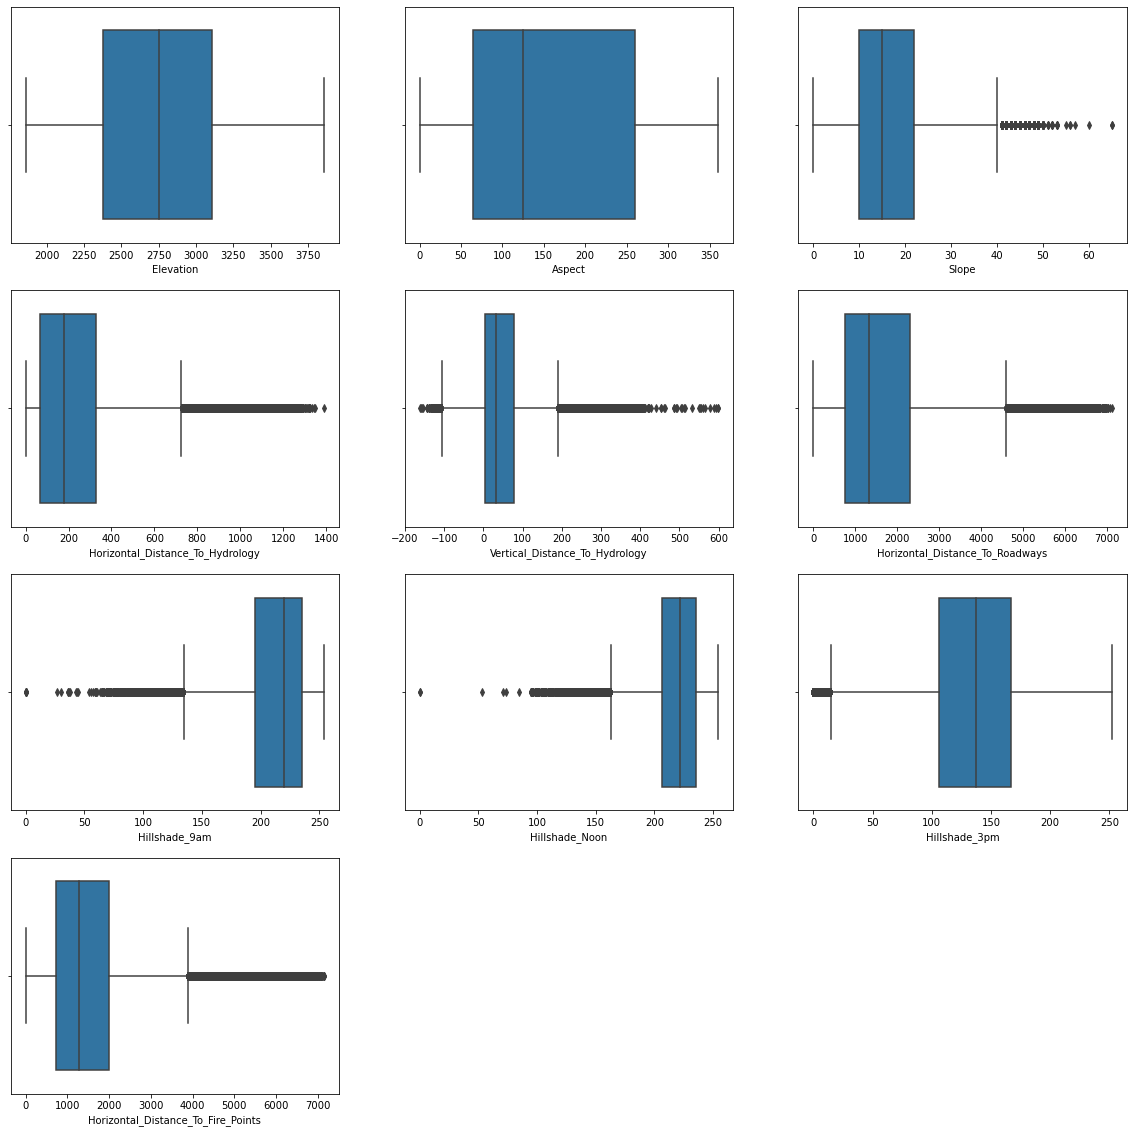

In [15]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=feature, data=df, whis=1.5)

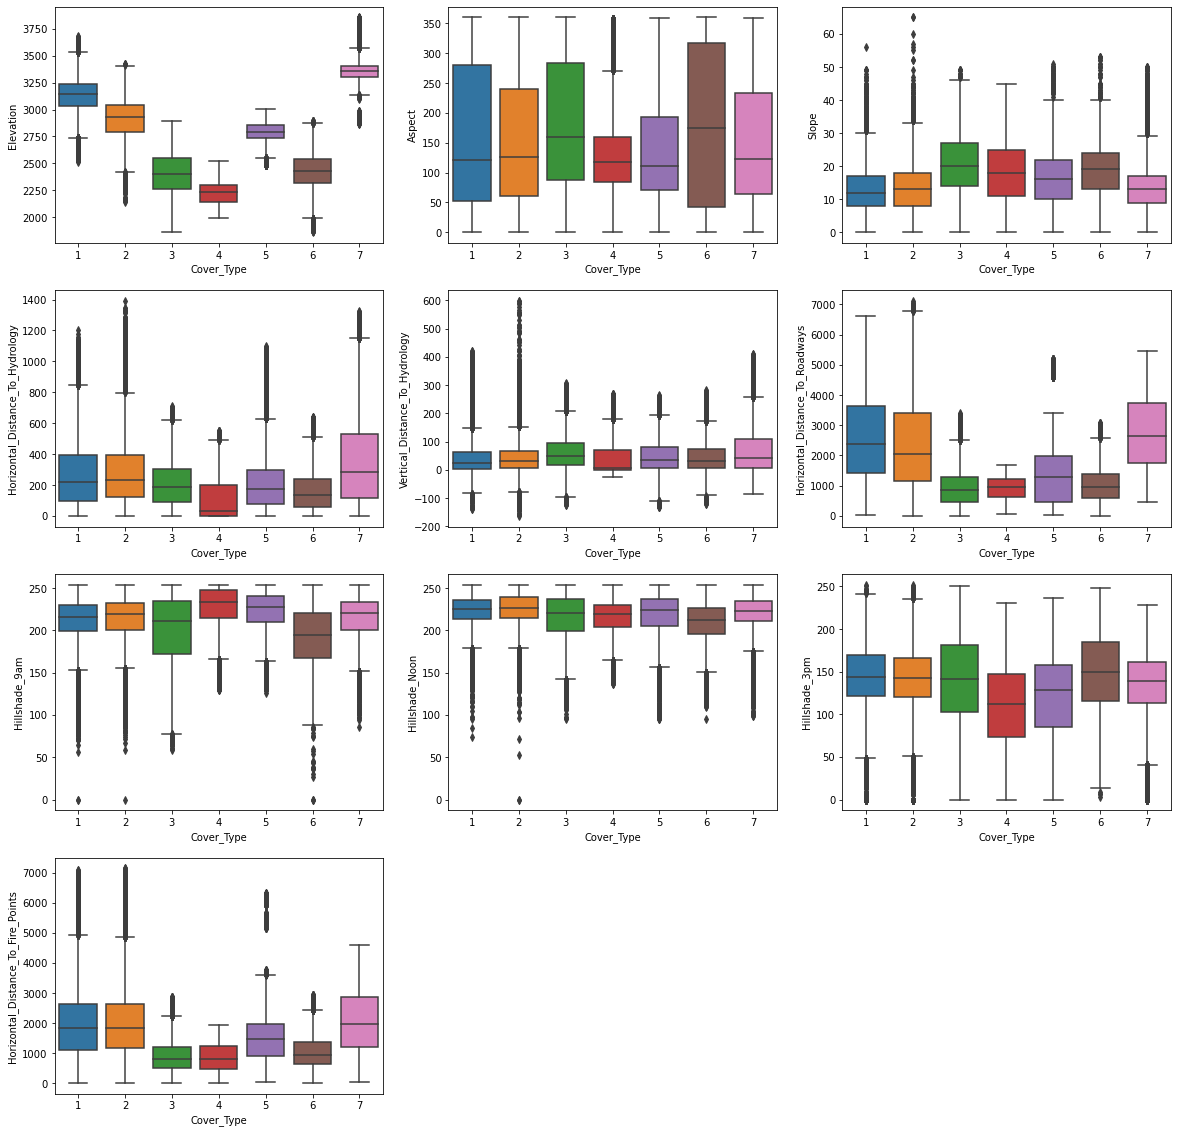

In [16]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = feature, x = "Cover_Type", data = df, whis=1.5)

### Deal with Outliers

In [17]:
from scipy.stats import zscore
from scipy import stats
from numpy import percentile

In [21]:
'''This function detects the best z-score for outlier detection in the specified column.'''

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.05, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
    
    df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
    df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    df_outlier['pct'] = df_outlier['pct'].apply(lambda x : x-100 if x == 100 else x)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    IQR_coef = round((best_treshold - 0.675) / 1.35, 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    num_outlier = df_outlier.iloc[df_outlier.pct.argmax(), 1]
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), colors="r", ls = ":")
    plt.annotate("Zscore : {}\nIQR_coef : {}\nValue : {}\nNum_outlier : {}\nPercentile : {}".format(best_treshold,
                                                                          IQR_coef,
                                                                          outlier_limit,
                                                                          num_outlier,     
                                                                          (np.round(percentile_threshold, 3), 
                                                                           np.round(100-percentile_threshold, 3))),
                                                                          (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, IQR_coef, outlier_limit, num_outlier, percentile_threshold)

In [22]:
'''This function plots histogram, boxplot and z-score/outlier graphs for the specified column.'''

def outlier_inspect(df, col, min_z = 1, max_z = 5, step = 0.05, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

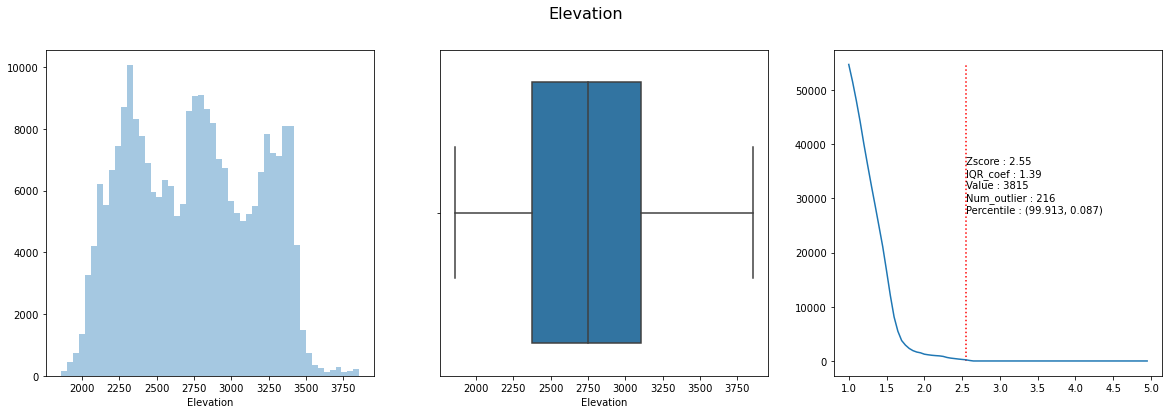

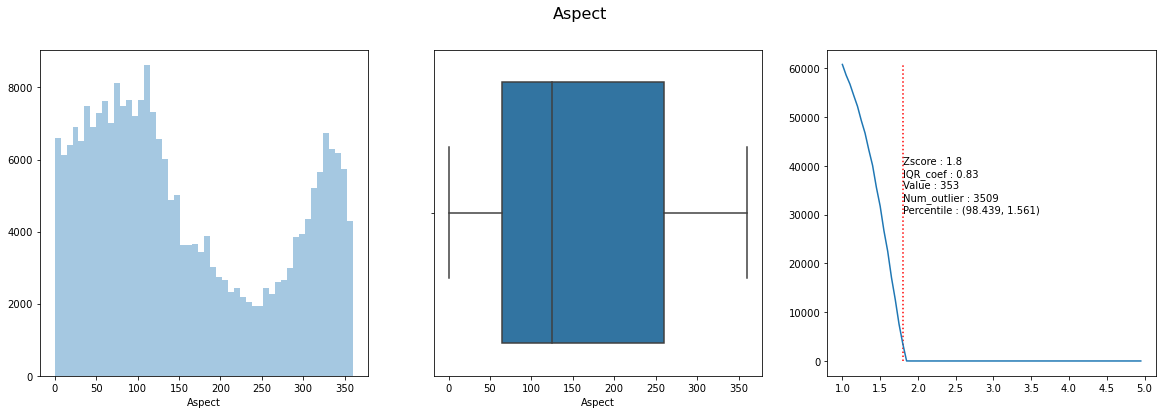

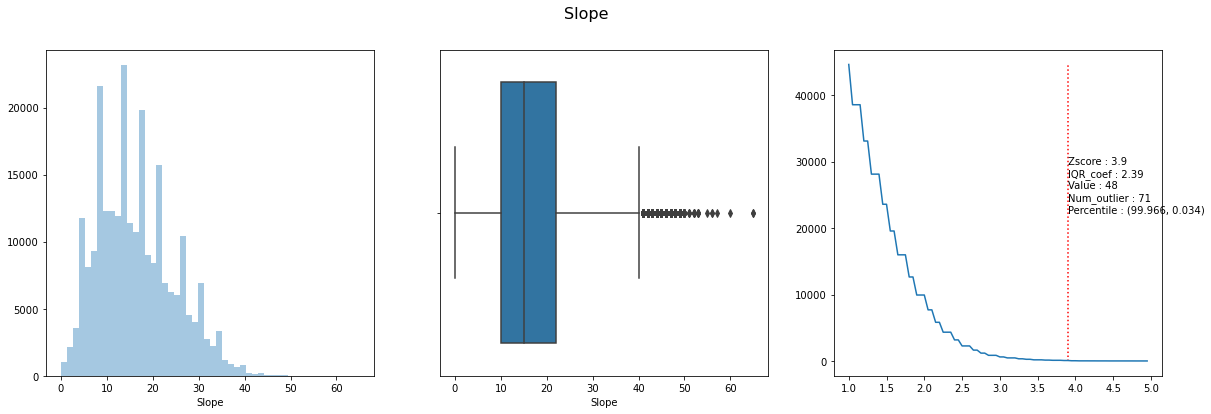

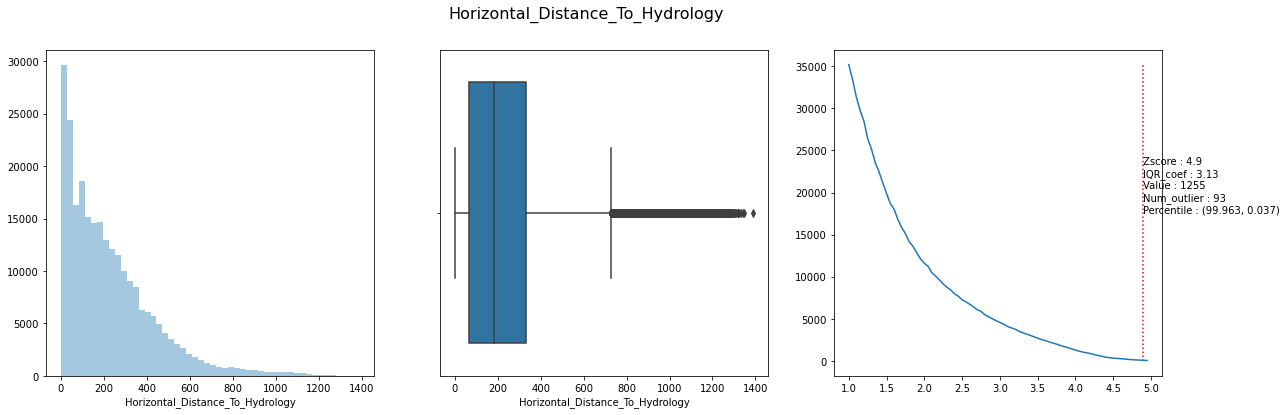

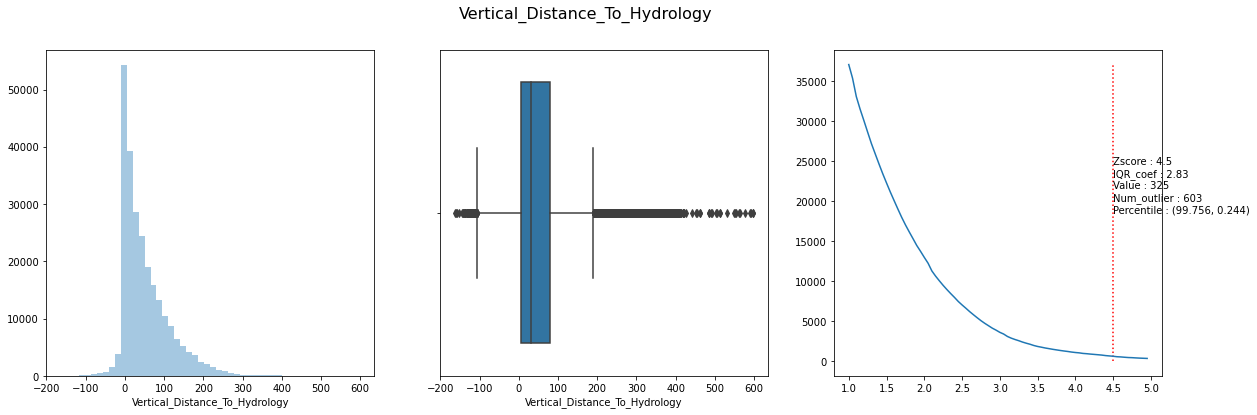

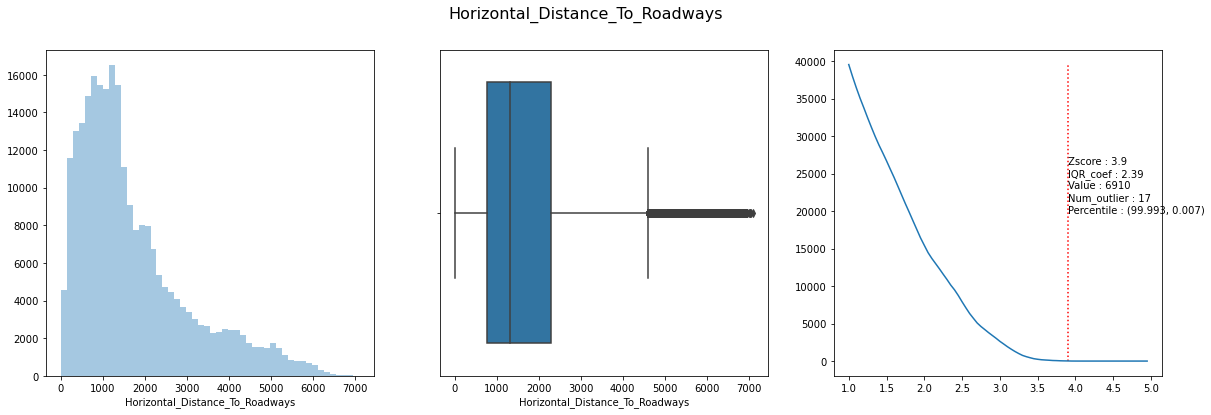

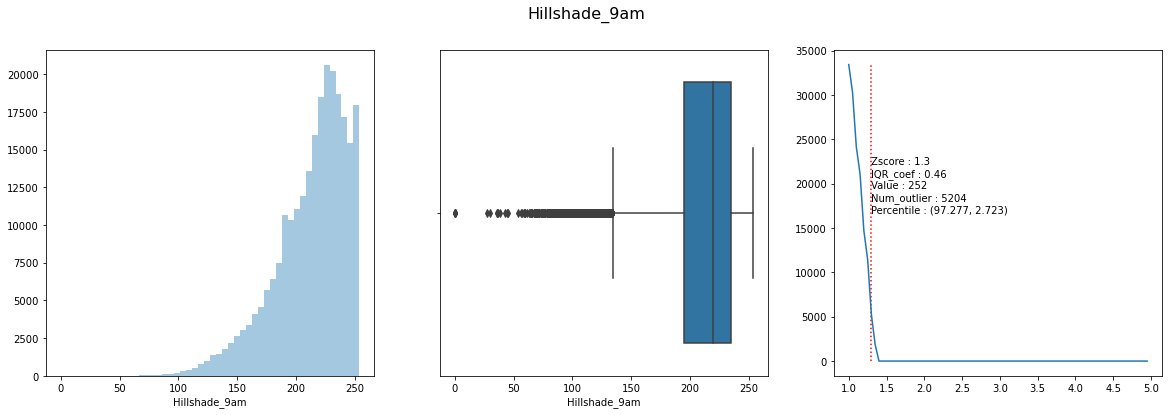

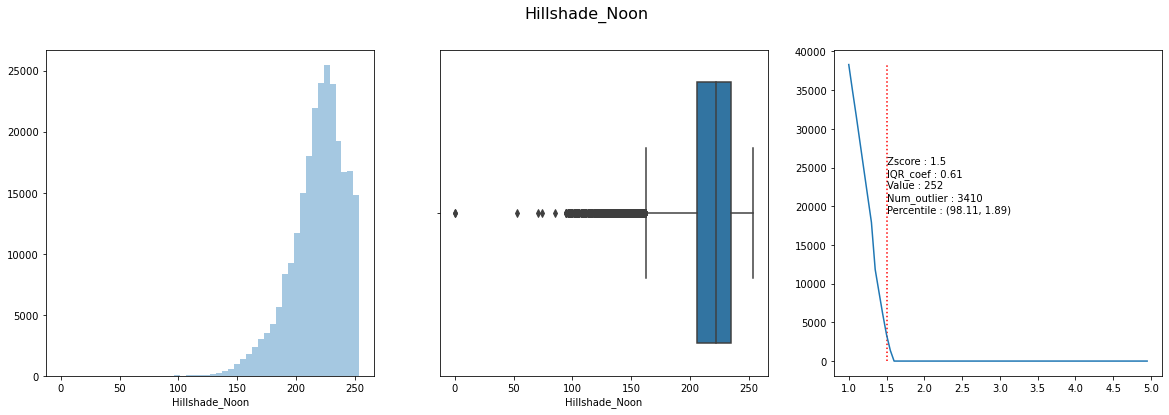

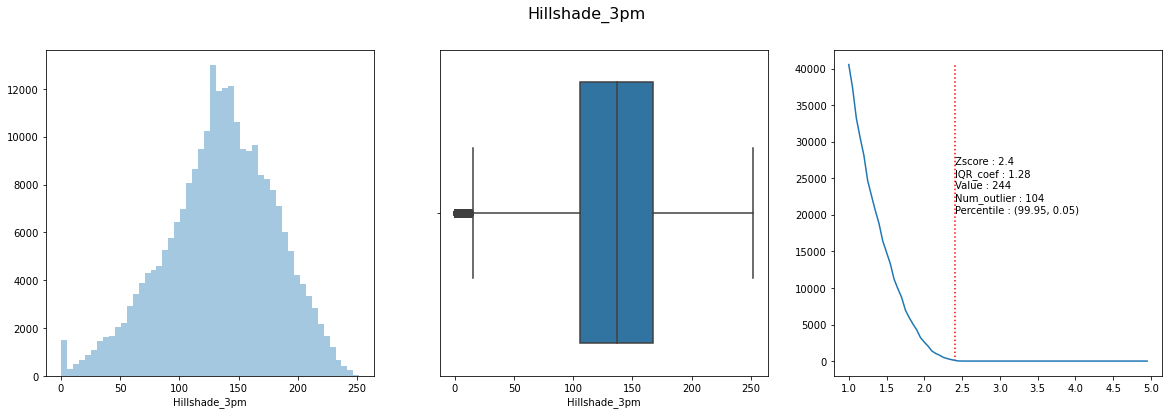

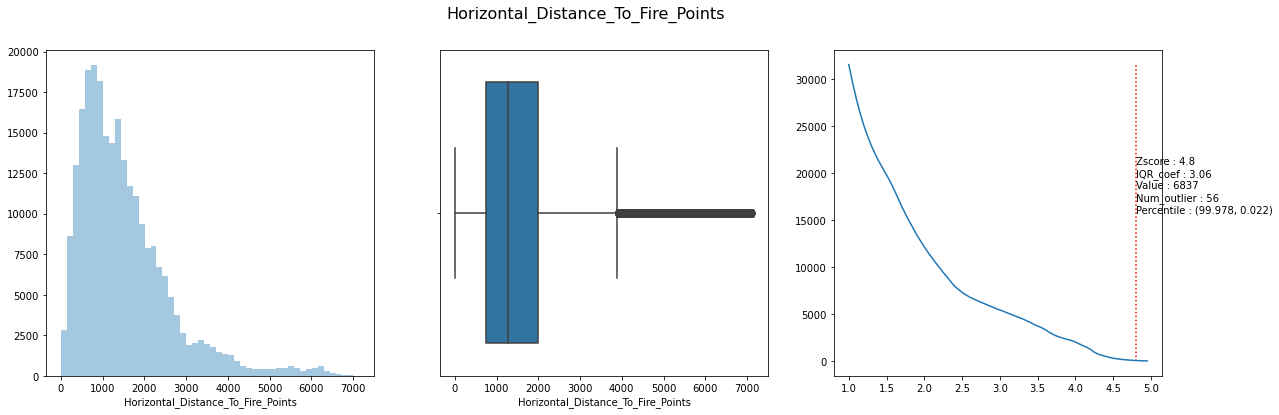

In [23]:
for col in df.columns[:10]:
    outlier_inspect(df, col)

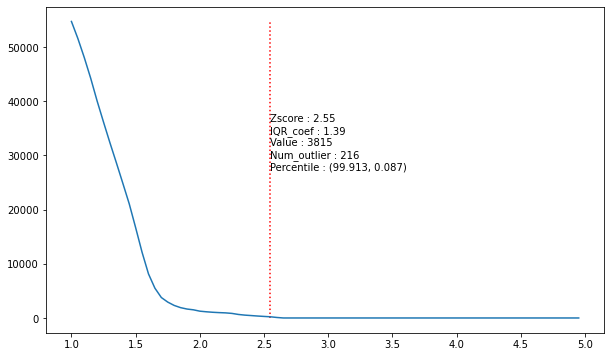

(<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>,
     threshold  outlier_count    pct
 0       1.000          54703  5.742
 1       1.050          51562  6.819
 2       1.100          48046  7.961
 3       1.150          44221  9.477
 4       1.200          40030  9.760
 5       1.250          36123 10.564
 6       1.300          32307 11.397
 7       1.350          28625 13.139
 8       1.400          24864 15.291
 9       1.450          21062 20.914
 10      1.500          16657 27.244
 11      1.550          12119 32.924
 12      1.600           8129 32.403
 13      1.650           5495 31.338
 14      1.700           3773 22.369
 15      1.750           2929 20.997
 16      1.800           2314 17.718
 17      1.850           1904 13.445
 18      1.900           1648  8.677
 19      1.950           1505 16.611
 20      2.000           1255  8.924
 21      2.050           1143  7.962
 22      2.100           1052  5.989
 23      2.150    

In [24]:
outlier_zscore(df, "Elevation")


- There is no missing value in this data set.
- When each feature is examined, although it is seen that there are outliers in the boxplots, it is evaluated that this dataset does not actually have an outlier.
- However, since it was considered that the data with a z-score value above 4.73 (IQR_coef = 3) according to the tree type would adversely affect the model, it was decided to assign the Nan-Value to these data first and then drop them.

In [25]:
#EValuation

IQR_coef = 3
z_score = round(0.675 + IQR_coef*1.35, 2)
z_score

4.73

In [27]:
z_score = 3
iqr_coef = round((z_score - 0.675) / 1.35, 2)
iqr_coef

1.72

#### *ii. Drop Outliers*

In [28]:
df1 = df.copy() 

In [29]:
"""This function gives max/min threshold, number of data, number of outlier and plots its boxplot,
according to the tree type and the entered z-score value for the relevant column."""

def num_outliers(df, col, whis = 1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    print("Column_name :", col)
    print("whis :", whis)
    print("-------------------------------------------")
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        print("min_threshold:", min_threshold, "\nmax_threshold:", max_threshold)
        num_outliers = len(df[df["Cover_Type"]==i][col][(df[col]<min_threshold) | (df[col]>max_threshold)])
        print(f"Num_of_values for {i} :", len(df[df["Cover_Type"]==i]))
        print(f"Num_of_outliers for {i} :", num_outliers)
        print("-------------------------------------------")
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

In [30]:
"""This function assigns the NaN-value first and then the mean value instead of the outlier values,
according to the tree type and the entered z_score value and plots the boxplot for the relevant column. """

def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
        df[col] = df[col].fillna(df.groupby("Cover_Type")[col].transform("mean"))
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

In [31]:
"""This function assigns the NaN-value first and then drop related rows, according to the tree type and the entered
whis value and plots the boxplot for the relevant column. """

def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

Column_name : Elevation
whis : 3
-------------------------------------------
min_threshold: 2438.0 
max_threshold: 3831.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: 2047.0 
max_threshold: 3783.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: 1395.0 
max_threshold: 3411.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 1655.0 
max_threshold: 2789.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 2363.0 
max_threshold: 3224.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 1655.0 
max_threshold: 3209.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: 2969.0 
max_threshold: 3739.0
Num_of_values for 7 

<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

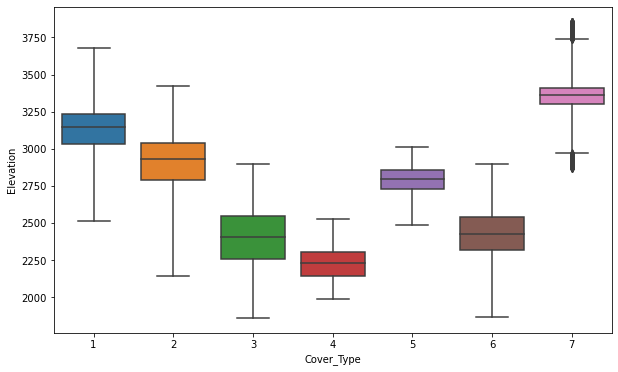

In [32]:
num_outliers(df1, "Elevation", whis=3)


<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

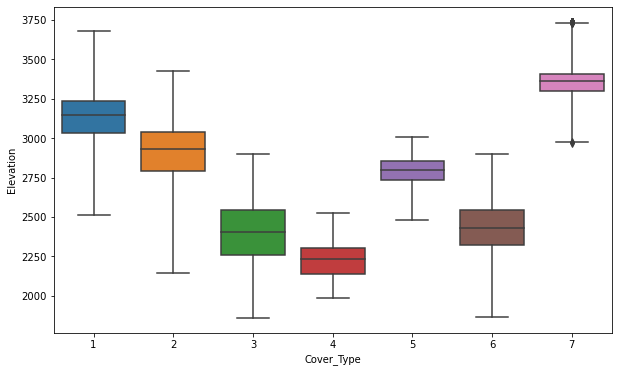

In [33]:
remove_outliers(df1, "Elevation", whis=3)

Column_name : Aspect
whis : 3
-------------------------------------------
min_threshold: -628.0 
max_threshold: 961.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -480.0 
max_threshold: 780.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -497.0 
max_threshold: 868.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -141.0 
max_threshold: 384.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -295.0 
max_threshold: 559.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -786.0 
max_threshold: 1146.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -443.0 
max_threshold: 740.0
Num_of_values for 7 : 35690
N

<AxesSubplot:xlabel='Cover_Type', ylabel='Aspect'>

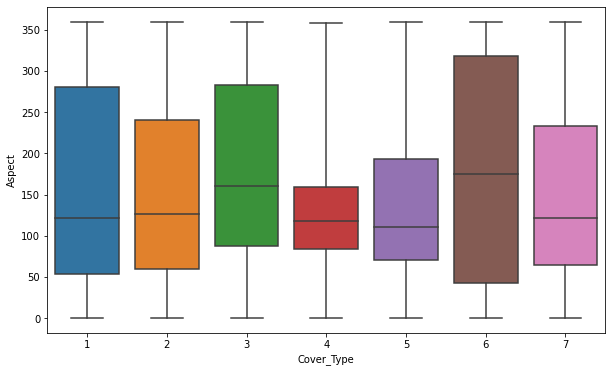

In [34]:
#ASpect

num_outliers(df1, "Aspect", whis=3)

Column_name : Slope
whis : 3
-------------------------------------------
min_threshold: -19.0 
max_threshold: 44.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 14
-------------------------------------------
min_threshold: -22.0 
max_threshold: 48.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 9
-------------------------------------------
min_threshold: -25.0 
max_threshold: 66.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -31.0 
max_threshold: 67.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -26.0 
max_threshold: 58.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -20.0 
max_threshold: 57.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -15.0 
max_threshold: 41.0
Num_of_values for 7 : 35690
Num_of_outliers 

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

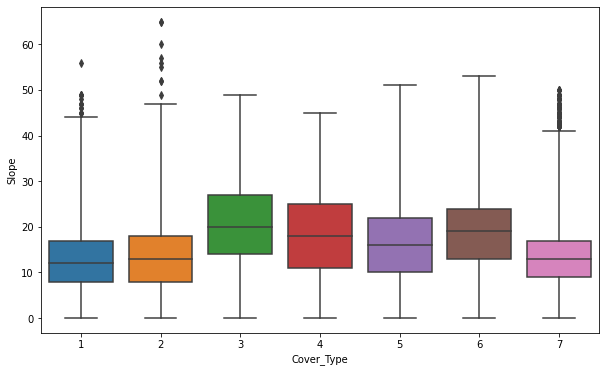

In [35]:
#Slope
num_outliers(df1, "Slope", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

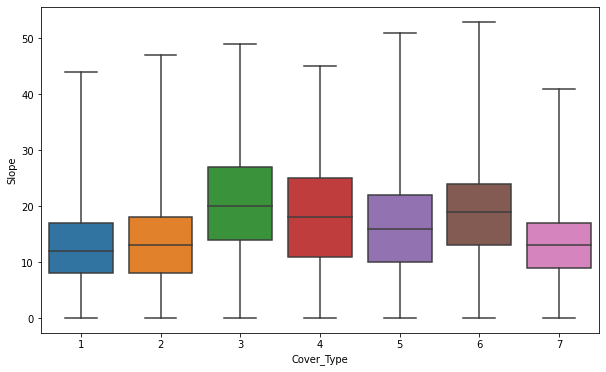

In [36]:
remove_outliers(df1, "Slope", whis=3)

Column_name : Horizontal_Distance_To_Hydrology
whis : 3
-------------------------------------------
min_threshold: -805.0 
max_threshold: 1295.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -693.0 
max_threshold: 1204.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 50
-------------------------------------------
min_threshold: -537.0 
max_threshold: 933.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -591.0 
max_threshold: 788.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -580.0 
max_threshold: 960.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 129
-------------------------------------------
min_threshold: -480.0 
max_threshold: 780.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -1118.0 
max_threshold: 1766

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

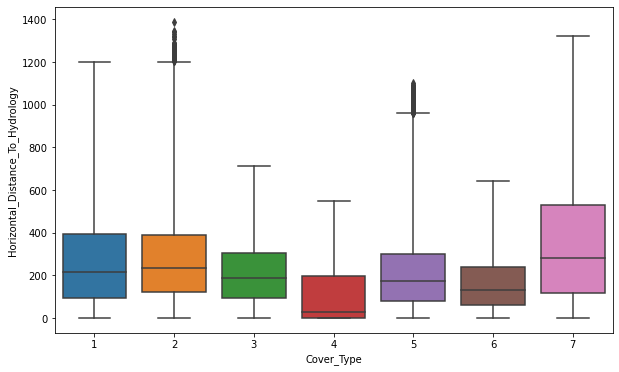

In [37]:
#Horizontal_Distance_To_Hydrology
num_outliers(df1, "Horizontal_Distance_To_Hydrology", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

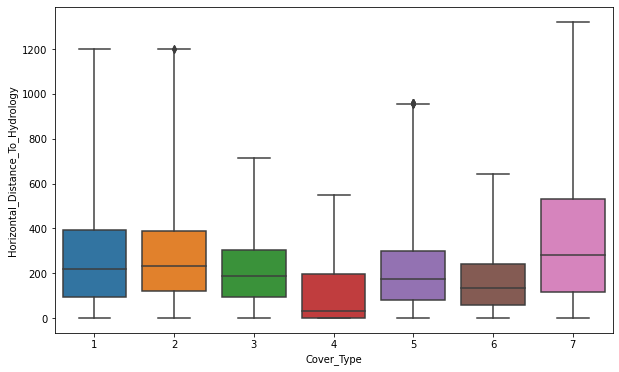

In [38]:
remove_outliers(df1, "Horizontal_Distance_To_Hydrology", whis=3)

Column_name : Vertical_Distance_To_Hydrology
whis : 3
-------------------------------------------
min_threshold: -170.0 
max_threshold: 236.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 391
-------------------------------------------
min_threshold: -166.0 
max_threshold: 240.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 445
-------------------------------------------
min_threshold: -210.0 
max_threshold: 322.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -216.0 
max_threshold: 288.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -223.0 
max_threshold: 309.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -190.0 
max_threshold: 272.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 9
-------------------------------------------
min_threshold: -292.0 
max_threshold: 408.0
Nu

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

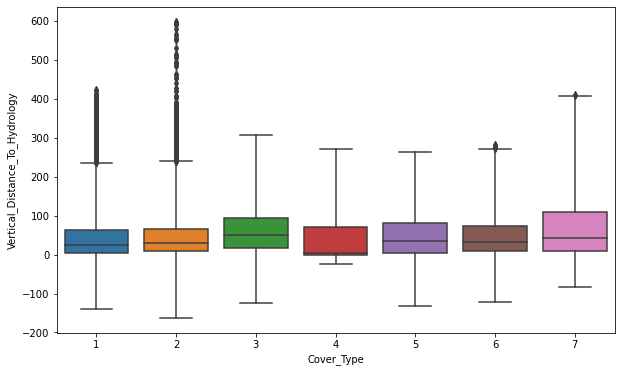

In [39]:
#Vertical_Distance_To_Hydrology
num_outliers(df1, "Vertical_Distance_To_Hydrology", whis=3)


<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

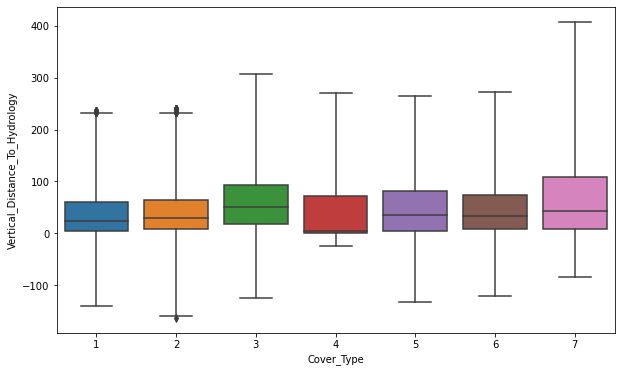

In [40]:
remove_outliers(df1, "Vertical_Distance_To_Hydrology", whis=3)

Column_name : Horizontal_Distance_To_Roadways
whis : 3
-------------------------------------------
min_threshold: -5270.0 
max_threshold: 10305.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -5620.0 
max_threshold: 10158.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -2013.0 
max_threshold: 3755.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -1153.0 
max_threshold: 2998.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -4010.0 
max_threshold: 6455.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -1777.0 
max_threshold: 3760.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -4265.0 
max_thresho

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Roadways'>

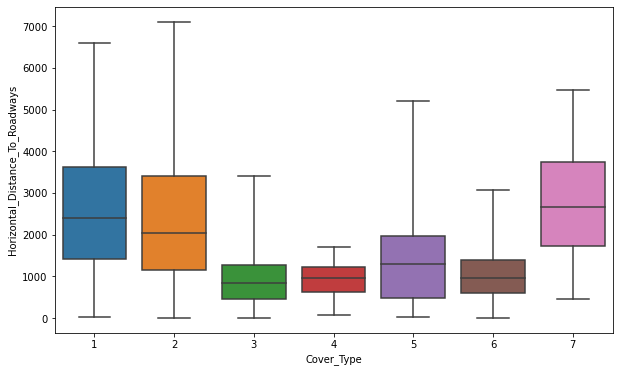

In [41]:
# Horizontal_Distance_To_Roadways
num_outliers(df1, "Horizontal_Distance_To_Roadways", whis=3)


Column_name : Hillshade_9am
whis : 3
-------------------------------------------
min_threshold: 106.0 
max_threshold: 323.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 68
-------------------------------------------
min_threshold: 108.0 
max_threshold: 325.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 79
-------------------------------------------
min_threshold: -17.0 
max_threshold: 424.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 116.0 
max_threshold: 347.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 117.0 
max_threshold: 334.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 8.0 
max_threshold: 379.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 3
-------------------------------------------
min_threshold: 102.0 
max_threshold: 333.0
Num_of_values for 7 : 35690
Nu

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_9am'>

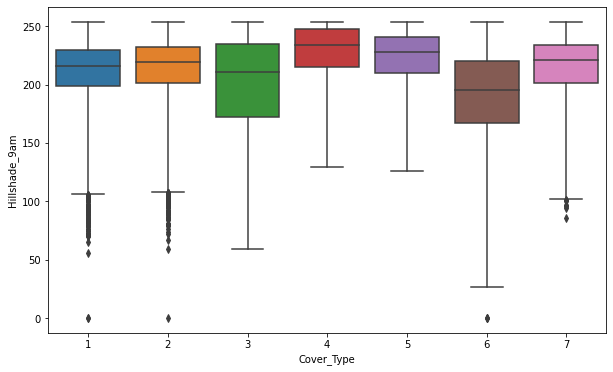

In [42]:
#Hillshade_9am
num_outliers(df1, "Hillshade_9am", whis=3)


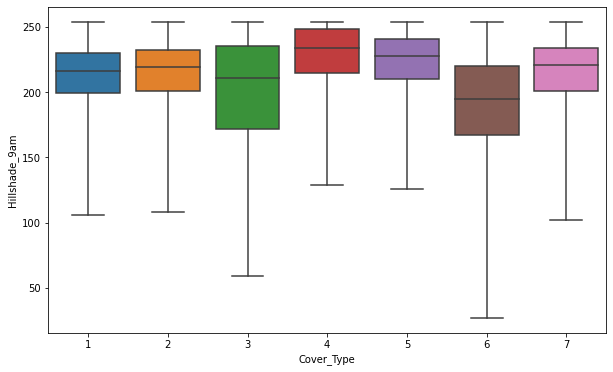

In [43]:
remove_outliers(df1, "Hillshade_9am", whis=3);

Column_name : Hillshade_Noon
whis : 3
-------------------------------------------
min_threshold: 144.0 
max_threshold: 305.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 54
-------------------------------------------
min_threshold: 143.0 
max_threshold: 311.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 48
-------------------------------------------
min_threshold: 85.0 
max_threshold: 351.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 126.0 
max_threshold: 308.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 109.0 
max_threshold: 333.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 50
-------------------------------------------
min_threshold: 106.0 
max_threshold: 316.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 1
-------------------------------------------
min_threshold: 139.0 
max_threshold: 307.0
Num_of_values for 7 : 35690

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_Noon'>

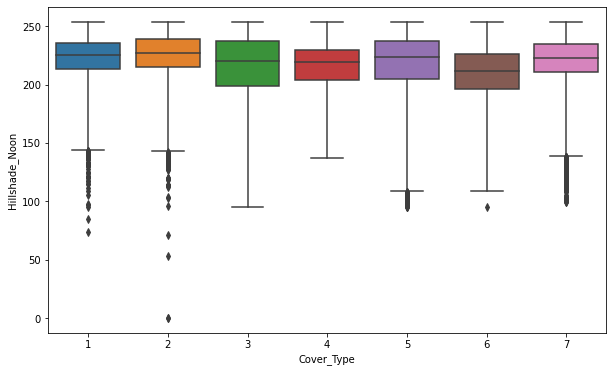

In [44]:
#Hillshade_Noon
num_outliers(df1, "Hillshade_Noon", whis=3) 


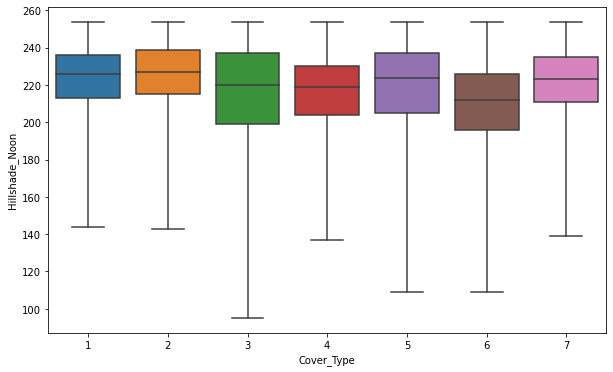

In [45]:
remove_outliers(df1, "Hillshade_Noon", whis=3);


Column_name : Hillshade_3pm
whis : 3
-------------------------------------------
min_threshold: -23.0 
max_threshold: 313.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -18.0 
max_threshold: 304.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -131.0 
max_threshold: 415.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -149.0 
max_threshold: 369.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -134.0 
max_threshold: 377.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -91.0 
max_threshold: 392.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -31.0 
max_threshold: 305.0
Num_of_values for 7 : 35690

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_3pm'>

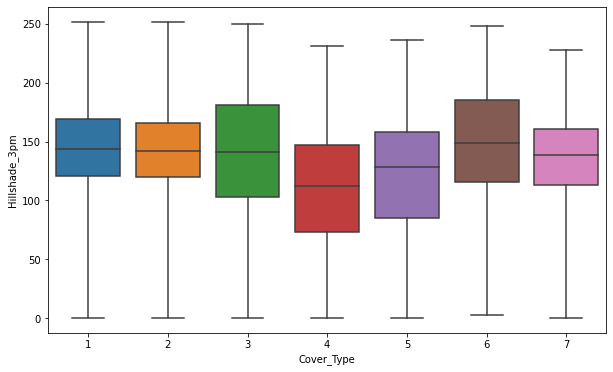

In [46]:
#Hillshade_3pm
num_outliers(df1, "Hillshade_3pm", whis=3)


Column_name : Horizontal_Distance_To_Fire_Points
whis : 3
-------------------------------------------
min_threshold: -3478.0 
max_threshold: 7218.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -3258.0 
max_threshold: 7081.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 6
-------------------------------------------
min_threshold: -1544.0 
max_threshold: 3251.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -1865.0 
max_threshold: 3581.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -2352.0 
max_threshold: 5229.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 1140
-------------------------------------------
min_threshold: -1509.5 
max_threshold: 3506.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -3834.0 
max_thr

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

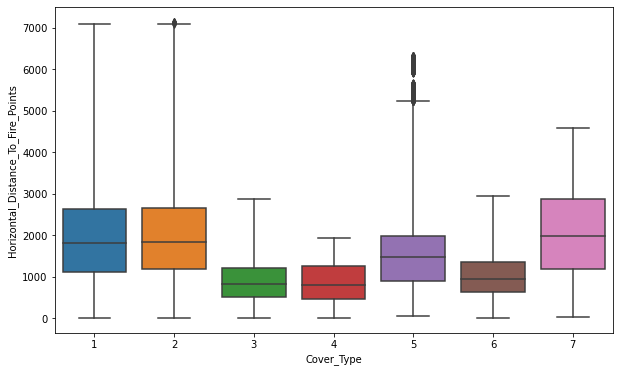

In [47]:
#Horizontal_Distance_To_Fire_Points
num_outliers(df1, "Horizontal_Distance_To_Fire_Points", whis=3)


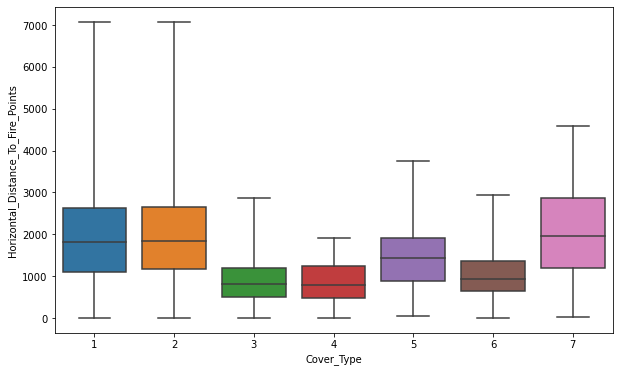

In [49]:
remove_outliers(df1, "Horizontal_Distance_To_Fire_Points", whis=3);

In [50]:
df.shape


(250000, 55)

In [51]:
df1.shape

(250000, 55)

In [53]:
df1.isnull().sum().sum()

3481

In [54]:
df1.dropna(inplace=True)


In [55]:
df1.isnull().sum().sum()

0

In [56]:
df.shape[0] - df1.shape[0]

3298

In [ ]:
# df, with Outliers
# df1, without Outliers

### Now, let's take a closer look at correlation of continuous columns.

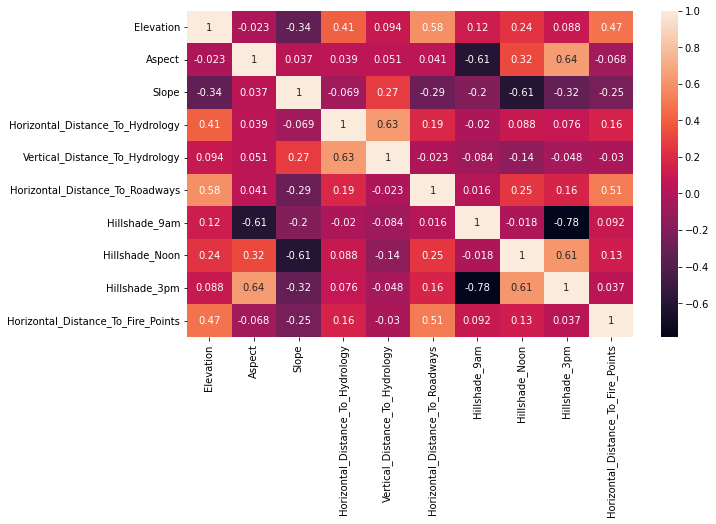

In [57]:
sns.heatmap(df1[df1.columns[:10]].corr(),annot=True)
plt.show()

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [59]:
df1['hori_verti_hypotenuse']=  ((df1['Horizontal_Distance_To_Hydrology']**2) + (df1['Vertical_Distance_To_Hydrology']**2))**(1/2)

In [61]:
df1['hori_hydro_road_avg']=(df1['Horizontal_Distance_To_Hydrology'] + df1['Horizontal_Distance_To_Roadways']) / 2

In [63]:
df1['eva_verti_hydro_avg'] = (df1['Elevation'] + df1['Vertical_Distance_To_Hydrology'])/2

In [65]:
df1.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'], axis=1,inplace =True)

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246702 entries, 0 to 249999
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           246702 non-null  float64
 1   Aspect                              246702 non-null  int64  
 2   Slope                               246702 non-null  float64
 3   Horizontal_Distance_To_Roadways     246702 non-null  int64  
 4   Hillshade_9am                       246702 non-null  float64
 5   Hillshade_Noon                      246702 non-null  float64
 6   Hillshade_3pm                       246702 non-null  int64  
 7   Horizontal_Distance_To_Fire_Points  246702 non-null  float64
 8   Wilderness_Area_1                   246702 non-null  int64  
 9   Wilderness_Area_2                   246702 non-null  int64  
 10  Wilderness_Area_3                   246702 non-null  int64  
 11  Wilderness_Area_4         

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [68]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [70]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
# Modelling and Model Performance

In [75]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision_macro" : precision_score(y_train, y_train_pred, average = "macro"),
                            "Recall_macro" : recall_score(y_train, y_train_pred, average = "macro"),                          
                            "f1_macro" : f1_score(y_train, y_train_pred, average = "macro")},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision_macro" : precision_score(y_test, y_pred, average = "macro"),
                           "Recall_macro" : recall_score(y_test, y_pred, average = "macro"),                          
                           "f1_macro" : f1_score(y_test, y_pred, average = "macro")}}
    
    return pd.DataFrame(scores)

In [76]:
def model_performance(y_train, y_train_pred, y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------")
    print(train_val(y_train, y_train_pred, y_test, y_pred))

In [77]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [78]:
def plot_multiclass_roc_for_svm(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [73]:
from sklearn.svm import SVC, LinearSVC


In [79]:
svm_model = LinearSVC(class_weight = "balanced", random_state = 101)
svm_model.fit(X_train_scaled, y_train)
y_pred_proba=svm_model.decision_function(X_test_scaled)
y_pred=svm_model.predict(X_test_scaled)
y_train_pred=svm_model.predict(X_train_scaled)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[6969 1634    8    0  683   99 1358]
 [2642 5166  259    5 2098  490   74]
 [   0   46 5305 1561  686 3019    0]
 [   0    0  555 9663    0  441    0]
 [ 373 1453  851    0 7546  601    0]
 [   0  422 1735 1207 1196 6148    0]
 [1094    7   36    0   63    0 9507]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.63      0.65      0.64     10751
           2       0.59      0.48      0.53     10734
           3       0.61      0.50      0.55     10617
           4       0.78      0.91      0.84     10659
           5       0.61      0.70      0.65     10824
           6       0.57      0.57      0.57     10708
           7       0.87      0.89      0.88     10707

    accuracy                           0.67     75000
   macro avg       0.67      0.67      0.67     75000
weighted avg       0.67      0.67      0.67     75000

-------------------------------------------------------
                 train_s

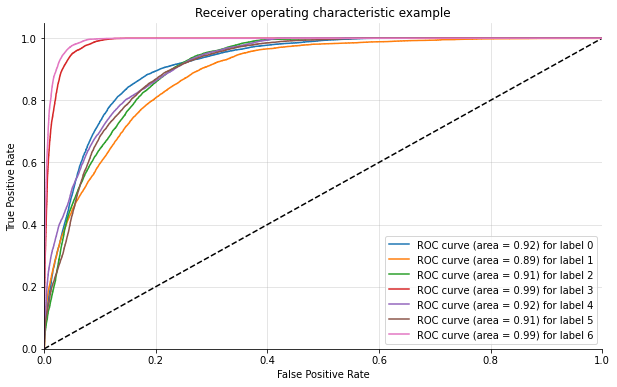

In [80]:
plot_multiclass_roc_for_svm(svm_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [81]:
svm_acc = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred, average = "macro")
svm_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
svm_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
svm_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")

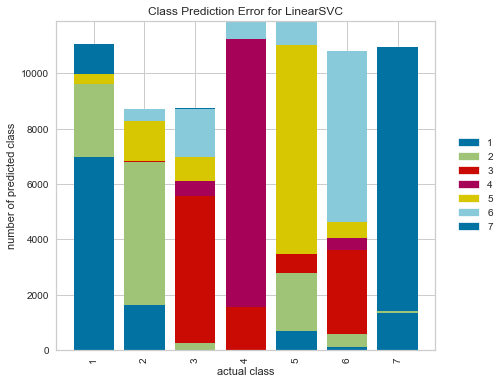

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [82]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(svm_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

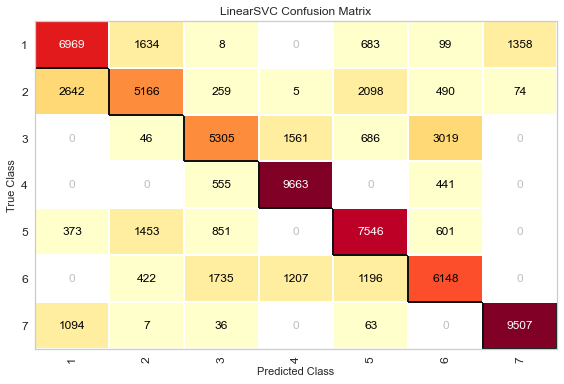

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [83]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

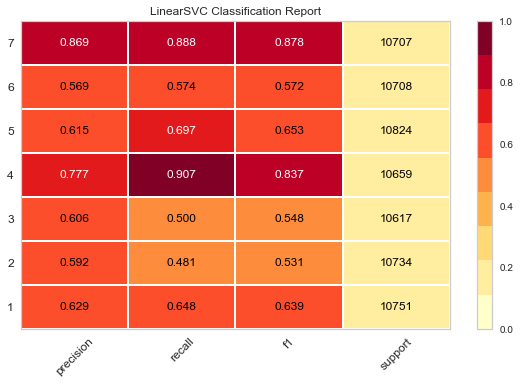

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [84]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=101)
dt_model.fit(X_train, y_train)
y_pred_proba=dt_model.predict_proba(X_test)
y_pred=dt_model.predict(X_test)
y_train_pred=dt_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[    0     0     0     0     0     0     0     0]
 [ 9179  1286     8     0    47     7   224     0]
 [ 1293  8806   161     0   300   138    36     0]
 [    4    94  9950   115    41   413     0     0]
 [    0     0    37 10583     0    39     0     0]
 [   25   113    14     0 10660    12     0     0]
 [    4    84   379    52    21 10168     0     0]
 [  128    11     0     0     1     0 10567     0]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.12      0.12      0.12     10751
           2       0.02      0.01      0.02     10734
           3       0.01      0.01      0.01     10617
           4       0.00      0.00      0.00     10659
           5       0.00      0.00      0.00     10824
           6       0.00      0.00      0.00     10708
           7       0.00      0.00      0.00     10707

    accuracy                           0.02    

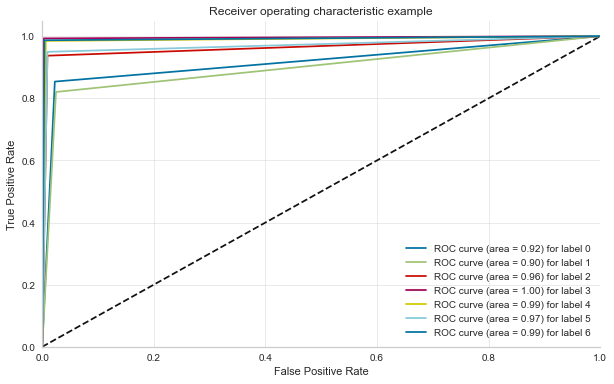

In [121]:
plot_multiclass_roc(dt_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [124]:
dt_acc = accuracy_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred, average = "macro")
dt_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
dt_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
dt_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
dt_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (7).

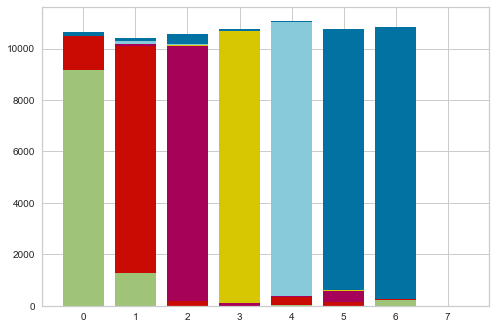

In [125]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

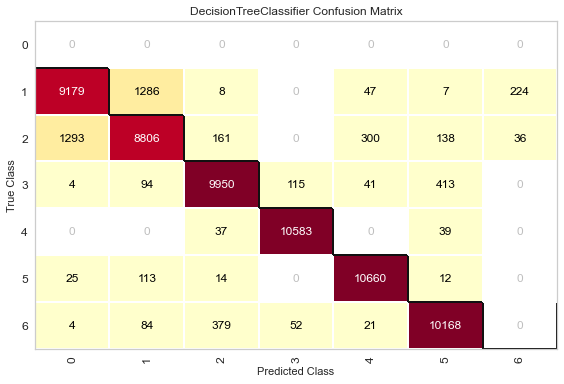

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [126]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(dt_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

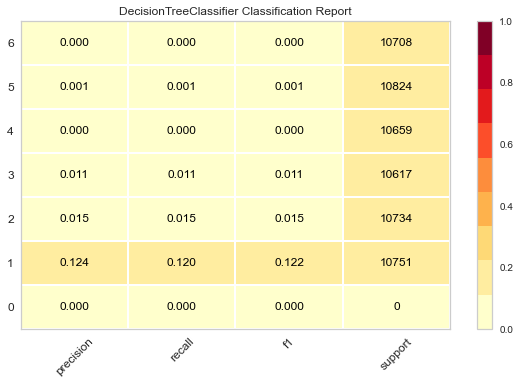

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [127]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(dt_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()


### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_model.fit(X_train, y_train)
y_pred_proba=rf_model.predict_proba(X_test)
y_pred=rf_model.predict(X_test)
y_train_pred=rf_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[ 9639   880     5     0    45     9   173]
 [  776  9478   131     0   193   138    18]
 [    0    14 10210    94    19   280     0]
 [    0     0     9 10646     0     4     0]
 [    0    22     9     0 10785     8     0]
 [    0     6   126    45     7 10524     0]
 [   34     1     0     0     3     0 10669]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.92      0.90      0.91     10751
           2       0.91      0.88      0.90     10734
           3       0.97      0.96      0.97     10617
           4       0.99      1.00      0.99     10659
           5       0.98      1.00      0.99     10824
           6       0.96      0.98      0.97     10708
           7       0.98      1.00      0.99     10707

    accuracy                           0.96     75000
   macro avg       0.96      0.96      0.96     75000
weighted avg       0.96      0.96      0.96     75000

-------------------------------

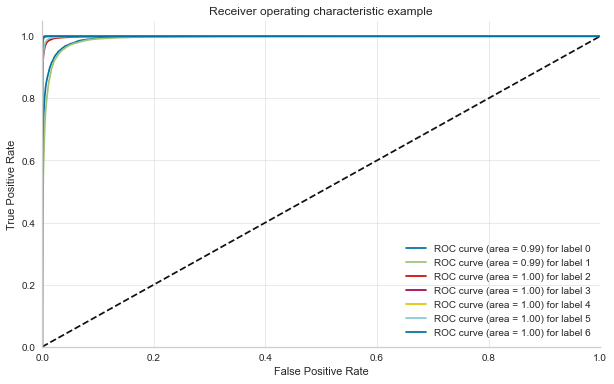

In [87]:
plot_multiclass_roc(rf_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [88]:
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred, average = "macro")
rf_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
rf_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
rf_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
rf_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

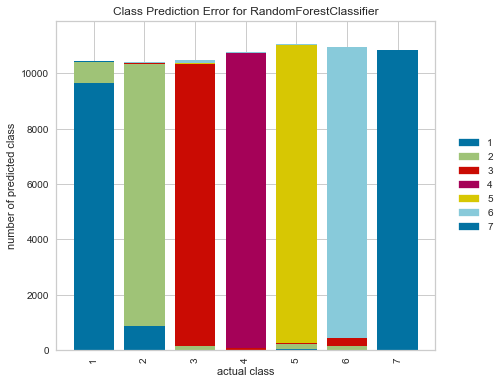

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [89]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

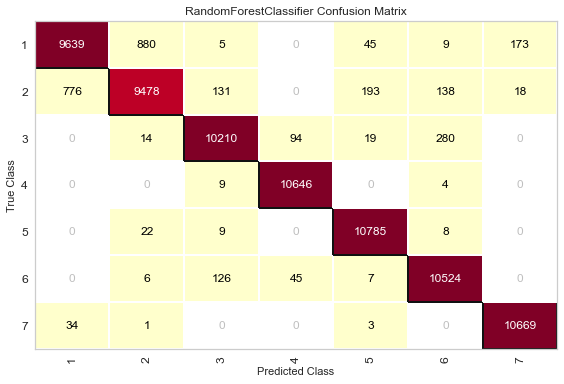

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [90]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

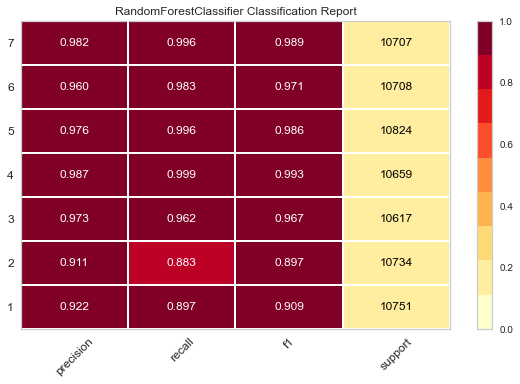

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [91]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()


### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [109]:
from xgboost import XGBClassifier

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [107]:
xgb_model = XGBClassifier(random_state=101)
xgb_model.fit(X_train, y_train)
y_pred_proba=xgb_model.predict_proba(X_test)
y_pred=xgb_model.predict(X_test)
y_train_pred=xgb_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[    0     0     0     0     0     0     0     0]
 [ 9063  1277     2     0   107    13   289     0]
 [ 1445  8442   168     0   465   185    29     0]
 [    0    29  9554   131    58   845     0     0]
 [    0     0    13 10627     0    19     0     0]
 [    9    68    42     0 10682    23     0     0]
 [    3    24   380    54    43 10204     0     0]
 [   87     2     0     0     2     0 10616     0]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.13      0.12      0.12     10751
           2       0.02      0.02      0.02     10734
           3       0.01      0.01      0.01     10617
           4       0.00      0.00      0.00     10659
           5       0.00      0.00      0.00     10824
           6       0.00      0.00      0.00     10708
           7       0.00      0.00      0.00     10707

    accuracy                           0.02    

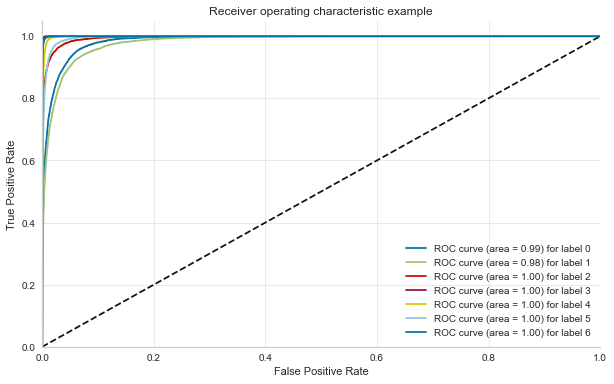

In [113]:
plot_multiclass_roc(xgb_model, X_test, y_test, n_classes=7, figsize=(10, 6))


In [114]:
xgb_acc = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average = "macro")
xgb_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
xgb_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
xgb_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
xgb_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (7).

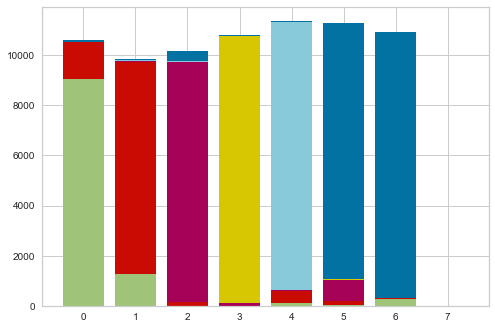

In [115]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

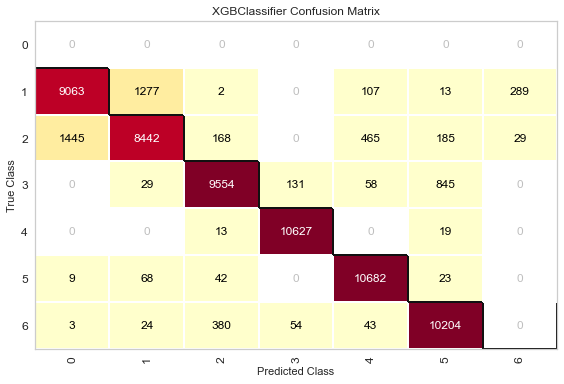

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [116]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

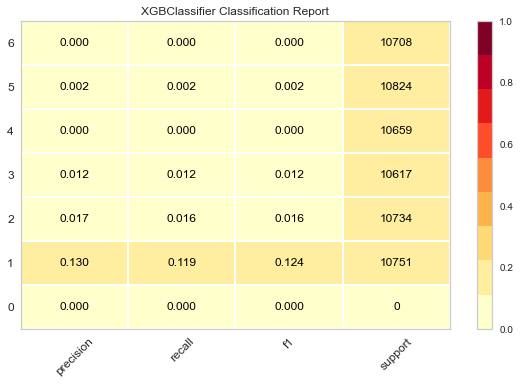

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [117]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(xgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

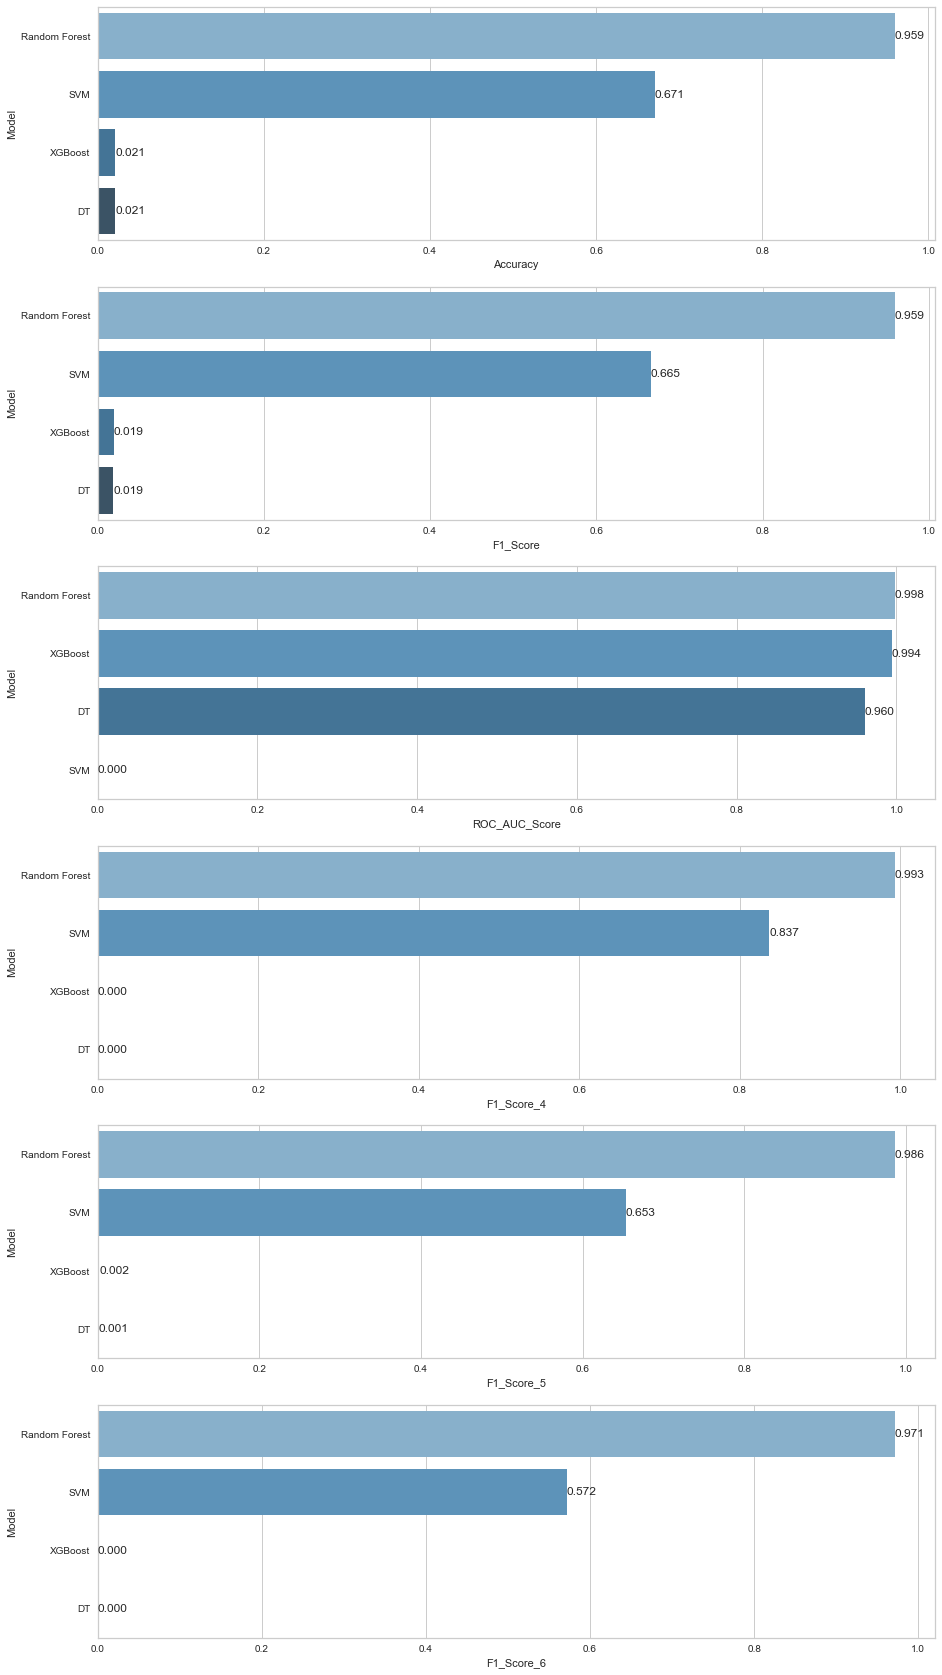

In [129]:
compare = pd.DataFrame({"Model": [ "DT","SVM", "Random Forest", "XGBoost"],
                        "Accuracy": [dt_acc,svm_acc, rf_acc, xgb_acc],
                        "F1_Score": [dt_f1,svm_f1, rf_f1, xgb_f1],
                        "F1_Score_4": [ dt_f1_4,svm_f1_4, rf_f1_4, xgb_f1_4],
                        "F1_Score_5": [dt_f1_5,svm_f1_5, rf_f1_5, xgb_f1_5],
                        "F1_Score_6": [dt_f1_6,svm_f1_6, rf_f1_6, xgb_f1_6],
                        "ROC_AUC_Score": [ dt_auc,0, rf_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(611)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(612)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(613)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(614)
compare = compare.sort_values(by="F1_Score_4", ascending=False)
ax=sns.barplot(x="F1_Score_4", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(615)
compare = compare.sort_values(by="F1_Score_5", ascending=False)
ax=sns.barplot(x="F1_Score_5", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(616)
compare = compare.sort_values(by="F1_Score_6", ascending=False)
ax=sns.barplot(x="F1_Score_6", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___